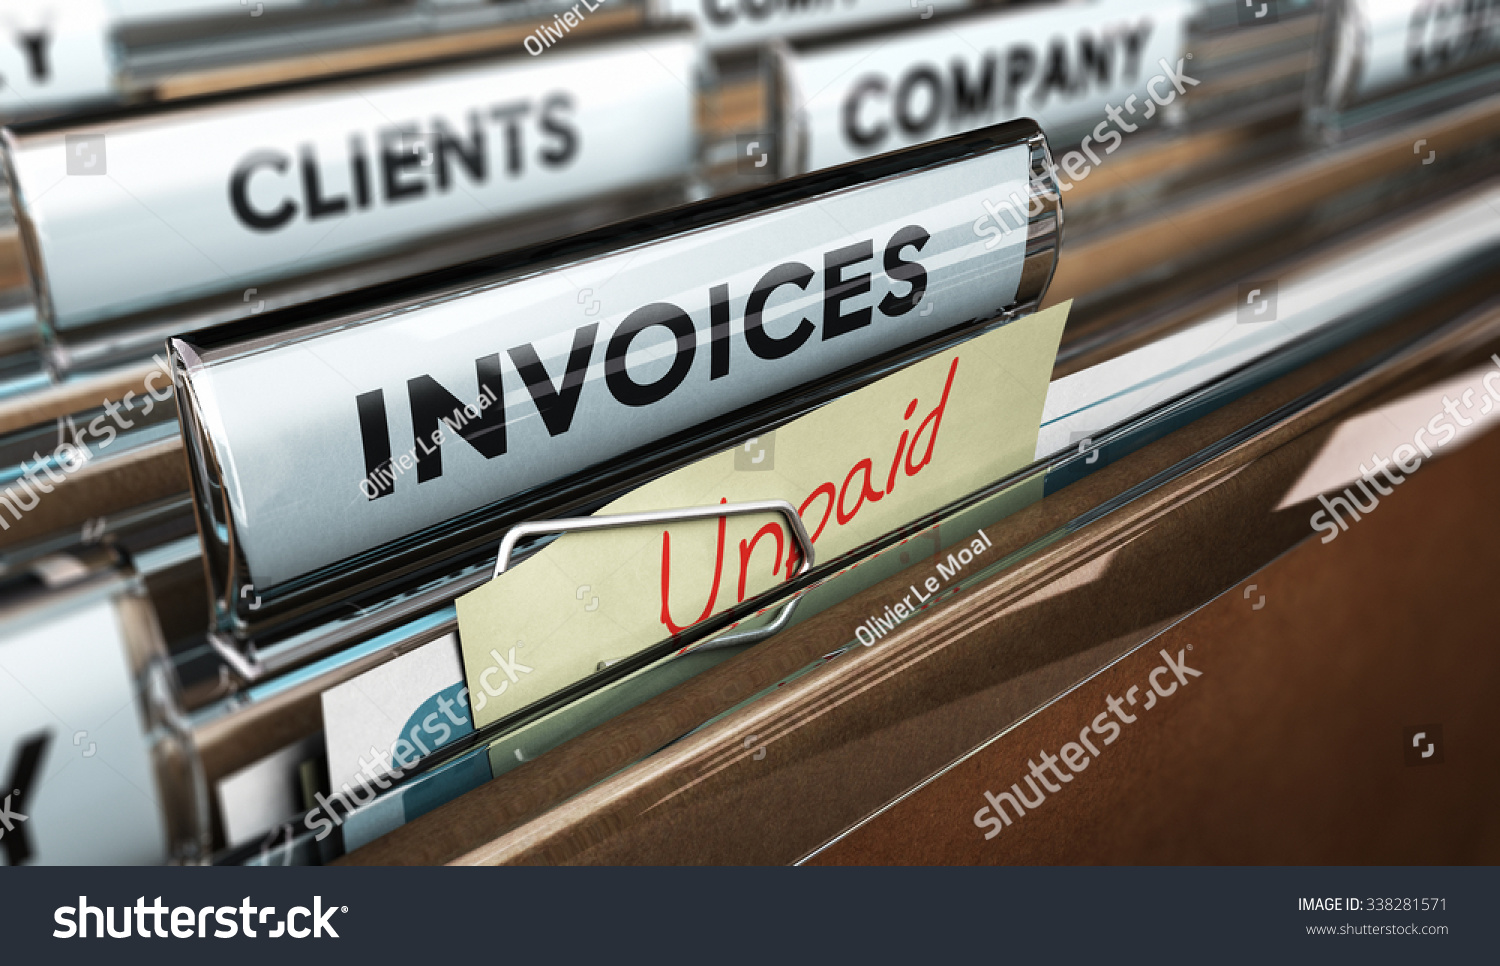

# Name: Sreelakshmy Arun
### Organization: Entri Elevate
#### Date: 27 December 2024

## 1. Overview of Problem Statement

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

To understand how to approach this problem using data science, let’s first understand the payment process at Schuster now. Every time a transaction of goods takes place with a vendor, the accounting team raises an invoice and shares it with the vendor. This invoice contains the details of the goods, the invoice value, the creation date and the payment due date based on the credit terms as per the contract. Business with these vendors occurs quite frequently. Hence, there are always multiple invoices associated with each vendor at any given time.

## 2. Objective

- Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).
- Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.
- It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

## 3.Data Description 

Source:https://drive.google.com/drive/folders/1hA-GmbczrVkQ-K_aKdCGFAMnD9BcyZlM?usp=drive_link

Table :Received Payment Data


- **RECEIPT_METHOD**: Method of payment made.
- **CUSTOMER_NAME**: Name of the customer/vendor.
- **CUSTOMER_NUMBER**: Unique identity number of the customer.
- **RECEIPT_DOC_NO**: Reference number of the payment receipt.
- **RECEIPT_DATE**: Date on which the payment was made.
- **CLASS**: Transaction class, assigned as PMT (short for Payment) since payments against these invoices have already been received.
- **CURRENCY_CODE**: Currency used for the payment.
- **Local_Amount**: Invoice value in local currency.
- **USD_Amount**: Invoice value converted to USD.
- **INVOICE_ALLOCATED**: Invoice number allocated to a particular vendor.
- **INVOICE_CREATION_DATE**: Date on which the invoice was created.
- **DUE_DATE**: Date by which the payment was due.
- **PAYMENT_TERM**: Number of days given to the vendor/customer for making the payment.
- **INVOICE_CLASS**: Three types of invoice classes - Credit Memo or Credit Note (CM), Debit Memo or Debit Note (DM), or Invoice (INV).
- **INVOICE_CURRENCY_CODE**: Currency code as per the invoice generated.
- **INVOICE_TYPE**: Indicates whether the invoice was created for physical goods or services (non-goods).

Table :Open Invoice Data

- **AS_OF_DATE**: As of the current date, that is 4th April, 2022 (when the report was extracted by Schuster).
- **Customer_Type**: Whether the customer is a third party or holding a direct relationship with Schuster.
- **Customer_Name**: Name of the customer/vendor.
- **Customer_Account_No**: Customer's unique identity number.
- **Transaction_Number**: Transaction number against each invoice.
- **Transaction_Date**: The date when the goods or services were sold by Schuster.
- **Payment_Term**: Days given to the vendor/customer for making the payments.
- **Due_Date**: Date when the actual payment is due from the vendor.
- **Transaction_Currency**: Currency in which the goods or services were sold.
- **Local_Amount**: Invoice value in local currency.
- **Transaction_Class**: Invoice class - CM (Credit Memo), DM (Debit Memo), INV (Invoice), or PMT (Payment).
- **AGE**: The age of the open invoice, calculated as the difference between the Invoice Due Date and the As-Of Date.
- **USD_Amount**: Invoice value in USD.
- **INV_CREATION_DATE**: Date when the invoice was created.

## 4. Data Collection

In [1]:
# Importing required lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Received payment data

## Step 1: Reading and Understanding the data

In [2]:
# Reading the dataset
rec_pay_data = pd.read_csv('Received_Payments_Data.csv')
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3]:
# Checking the shape of the data
rec_pay_data.shape

(93937, 16)

In [4]:
# Checking the info of the dataset
rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [5]:
# Checking the distribution of data
rec_pay_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


# 5. Data Preprocessing - Data Cleaning:

In [6]:
# checking number of unique values in each column
rec_pay_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [7]:
# Null counts
round(rec_pay_data.isna().sum()/len(rec_pay_data.index), 4)

RECEIPT_METHOD           0.0000
CUSTOMER_NAME            0.0000
CUSTOMER_NUMBER          0.0000
RECEIPT_DOC_NO           0.0003
RECEIPT_DATE             0.0000
CLASS                    0.0000
CURRENCY_CODE            0.0000
Local Amount             0.0000
USD Amount               0.0000
INVOICE_ALLOCATED        0.0000
INVOICE_CREATION_DATE    0.0000
DUE_DATE                 0.0000
PAYMENT_TERM             0.0000
INVOICE_CLASS            0.0000
INVOICE_CURRENCY_CODE    0.0000
INVOICE_TYPE             0.0000
dtype: float64

## The "RECEIPT_DOC_NO" col has 0.03% null values. Dropping the columns as it is not important for model building.

In [8]:
# Dropping the "RECEIPT_DOC_NO" column
rec_pay_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

# Checking the head of data again
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [9]:
# Changing the date related columns to pandas datatime object

rec_pay_data['RECEIPT_DATE'] = pd.to_datetime(rec_pay_data['RECEIPT_DATE'])
rec_pay_data['INVOICE_CREATION_DATE'] = pd.to_datetime(rec_pay_data['INVOICE_CREATION_DATE'])
rec_pay_data['DUE_DATE'] = pd.to_datetime(rec_pay_data['DUE_DATE'])

In [10]:
rec_pay_data.info() # Sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

## Creating the target column 'default' based on the late bill payment.

In [11]:
# Using boolean values and converting them into integer to create the target column 'default'
rec_pay_data['default'] = (rec_pay_data["RECEIPT_DATE"] > rec_pay_data["DUE_DATE"]).astype(int)

In [12]:
# Checking the count of defaulted bill payments
rec_pay_data.default.value_counts()

default
1    61978
0    31959
Name: count, dtype: int64

In [13]:
# Checking the percentage of defaulted bill payments
rec_pay_data.default.value_counts(normalize=True)

default
1    0.659783
0    0.340217
Name: proportion, dtype: float64

# 6. Exploratory Data Analysis (EDA):

In [14]:
# Categorical Columns
cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']

# Numerical Columns
num_cols= ['Local Amount', 'USD Amount']

### Univariate Analysis

### Numerical Columns

In [15]:
# 'Local Amount' column summary
rec_pay_data['Local Amount'].describe().round()

count       93937.0
mean      1066470.0
std       1546901.0
min             0.0
25%         81980.0
50%        405344.0
75%       1425606.0
max      10849829.0
Name: Local Amount, dtype: float64

In [16]:
# Checking the number of bills with Local Amount equal to 0
rec_pay_data[rec_pay_data['Local Amount'] == 0].shape

(1126, 16)

## 1126 bills have amount equal to 0, hence dropping these rows.

In [17]:
# Dropping the rows with 'Local Amount' = 0
rec_pay_data = rec_pay_data[rec_pay_data['Local Amount'] > 0]

# Checking the shape again
rec_pay_data.shape

(92811, 16)

In [18]:
# Checking the summary of 'Local Amount' column again
rec_pay_data['Local Amount'].describe().round()

count       92811.0
mean      1079408.0
std       1551763.0
min             5.0
25%         90577.0
50%        415084.0
75%       1465108.0
max      10849829.0
Name: Local Amount, dtype: float64

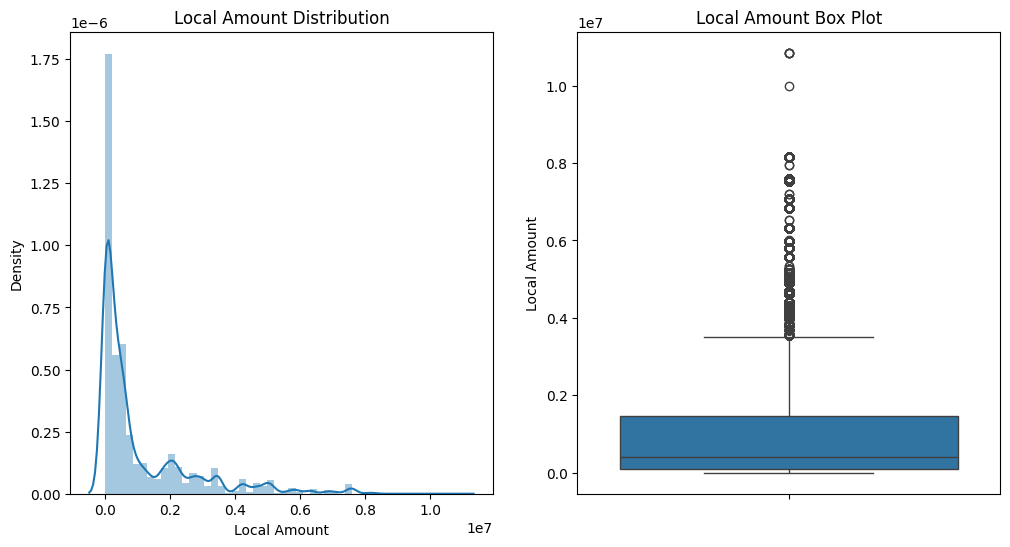

In [19]:
# Visualizing the distribution of 'Local Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rec_pay_data['Local Amount'])
plt.title("Local Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rec_pay_data['Local Amount'])
plt.title("Local Amount Box Plot")

plt.show()

## Dropping the 'Local Amount' column as it does not have a single currency value and we already have 'USD Amount' column for bill amount.

In [20]:
# Dropping the 'Local Amount' column
rec_pay_data.drop('Local Amount', axis=1, inplace=True)

# Checking the head of data
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [21]:
# 'USD Amount' column summary
rec_pay_data['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

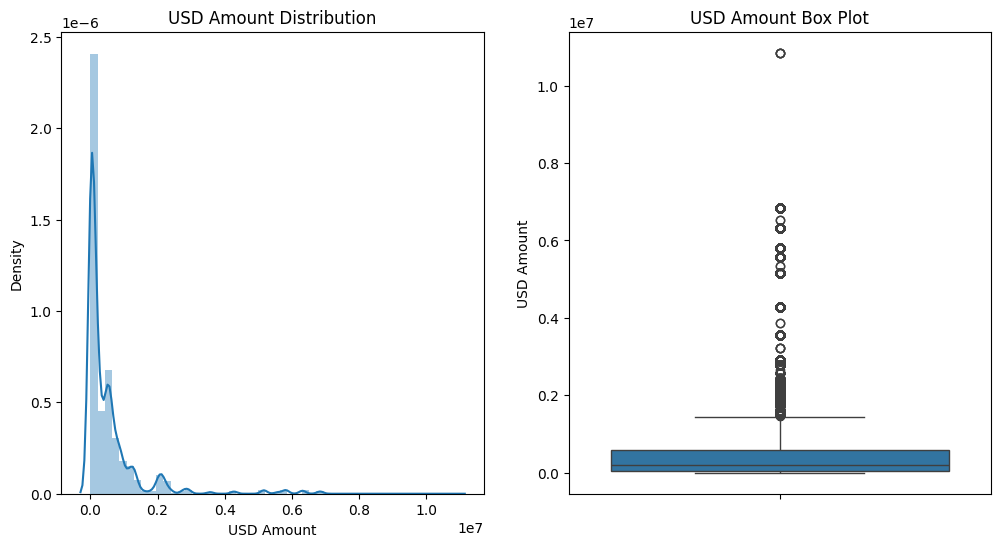

In [22]:
# Visualizing the distribution of 'USD Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rec_pay_data['USD Amount'])
plt.title("USD Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rec_pay_data['USD Amount'])
plt.title("USD Amount Box Plot")

plt.show()

## Categorical Columns

## CUSTOMER_NAME column

In [23]:
# Finding the number of Unique customer names
rec_pay_data['CUSTOMER_NAME'].nunique()

689

In [24]:
# Top 10 customers on the basis total invoices
rec_pay_data['CUSTOMER_NAME'].value_counts().head(10)

CUSTOMER_NAME
SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1647
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: count, dtype: int64

In [25]:
# Top 10 customers based on the invoice amounts in USD.
rec_pay_data.groupby('CUSTOMER_NAME')['USD Amount'].sum().sort_values(ascending=False).head(10)

CUSTOMER_NAME
SEPH Corp    3.253371e+10
FARO Corp    5.790071e+09
PARF Corp    3.200510e+09
ALLI Corp    2.580741e+09
AREE Corp    1.125144e+09
HABC Corp    5.343216e+08
RADW Corp    3.622376e+08
L OR Corp    2.955509e+08
CGR  Corp    2.795162e+08
PCD  Corp    2.466070e+08
Name: USD Amount, dtype: float64

## CLASS column

In [26]:
# Checking the number of unique values in the column
rec_pay_data['CLASS'].nunique()

1

In [27]:
# Dropping the CLASS column as it has only one value
rec_pay_data.drop('CLASS', axis=1, inplace=True)

#### CURRENCY_CODE column

In [28]:
# Checking the number of unique values in the column
rec_pay_data['CURRENCY_CODE'].nunique()

8

In [29]:
# Checking the value counts of each currency code
rec_pay_data['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
AED    36027
SAR    35784
USD    19361
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

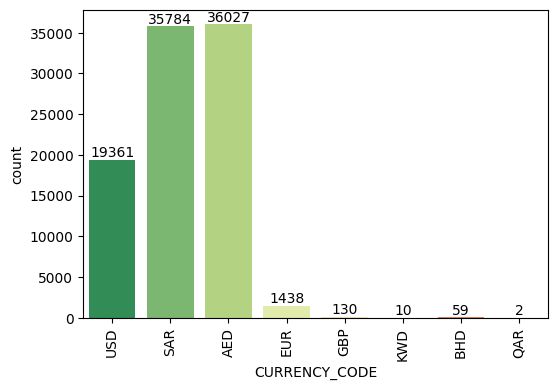

In [30]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=rec_pay_data, x='CURRENCY_CODE', palette='RdYlGn_r')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

# Currency used for bill payments are mostly USD, SAR or AED.

#### PAYMENT_TERM column

In [31]:
# Checking the number of unique values in the column
rec_pay_data['PAYMENT_TERM'].nunique()

42

In [32]:
# Checking the list of unique values
rec_pay_data['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [33]:
# Checking the top 10 PAYMENT_TERM
rec_pay_data['PAYMENT_TERM'].value_counts().head(10)

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
15 Days from EOM          7533
Immediate Payment         5468
Immediate                 4946
90 Days from EOM          3893
45 Days from Inv Date     3550
45 Days from EOM          3509
Name: count, dtype: int64

#### INVOICE_CLASS column

In [34]:
# Checking the value count of each level of INVOICE_CLASS
rec_pay_data['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    87313
CM      4946
DM       552
Name: count, dtype: int64

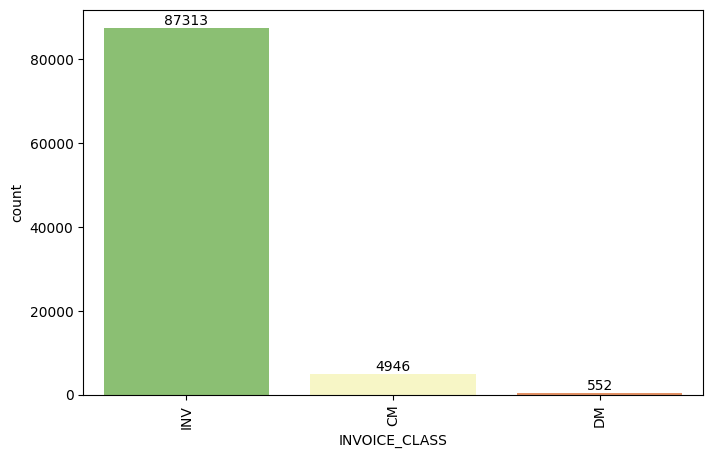

In [35]:
# Visualising the column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=rec_pay_data, x='INVOICE_CLASS', palette='RdYlGn_r')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

### INV has the maximum number of bills in INVOICE_CLASS column.

#### INVOICE_CURRENCY_CODE column

In [36]:
# Checking the number of unique values in the column
rec_pay_data['INVOICE_CURRENCY_CODE'].nunique()

10

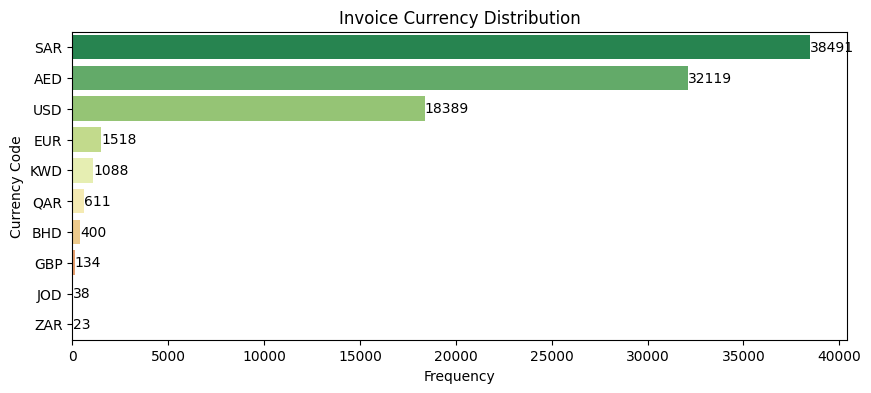

In [37]:
# Visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=rec_pay_data, y='INVOICE_CURRENCY_CODE', order=rec_pay_data['INVOICE_CURRENCY_CODE'].value_counts().index, palette='RdYlGn_r')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Invoice Currency Distribution")
plt.ylabel("Currency Code")
plt.xlabel("Frequency")

plt.show()

## Insight:The most number of invoices were generated in SAR, AED and USD currency.

#### INVOICE_TYPE column

In [38]:
# Checking the value count of each level of INVOICE_TYPE
rec_pay_data['INVOICE_TYPE'].value_counts()

INVOICE_TYPE
Goods        66569
Non Goods    26242
Name: count, dtype: int64

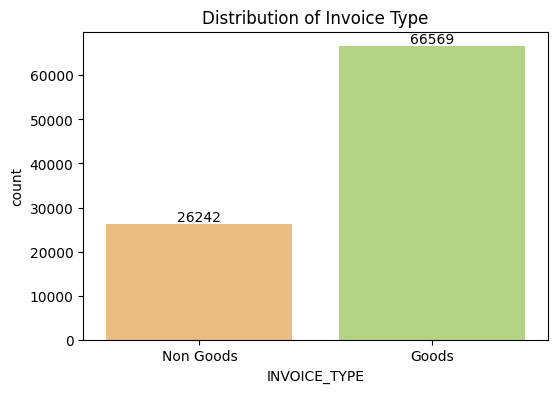

In [39]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=rec_pay_data, x='INVOICE_TYPE', palette='RdYlGn')

for label in ax.containers:
    ax.bar_label(label)

plt.title("Distribution of Invoice Type")
plt.show()

## Insight: Almost 70% of the invoices generated were for Goods products.

#### RECEIPT_METHOD column

In [40]:
# Checking the value count of each level of RECEIPT_METHOD
rec_pay_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

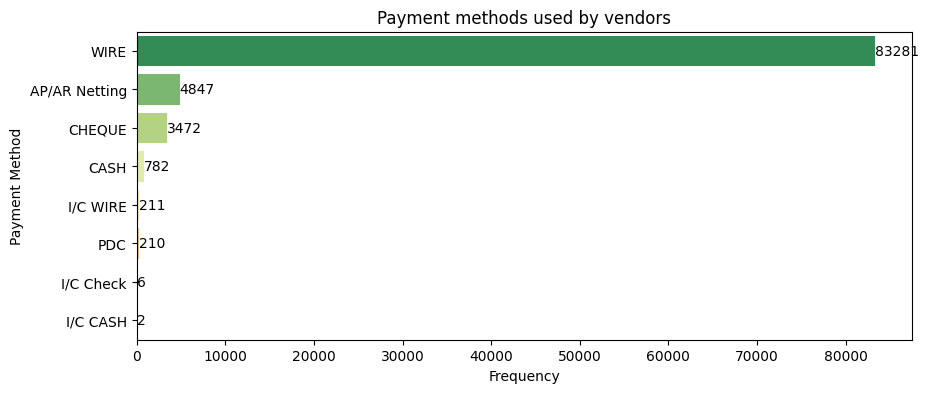

In [41]:
# Visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=rec_pay_data, y='RECEIPT_METHOD', order=rec_pay_data['RECEIPT_METHOD'].value_counts().index, palette='RdYlGn_r')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Payment methods used by vendors")
plt.ylabel("Payment Method")
plt.xlabel("Frequency")

plt.show()

### Insight:The most preferred payment method for bill payment is WIRE.

### Data Imbalance

In [42]:
# Checking the distribution of target column 'default'
rec_pay_data["default"].value_counts(normalize= True)

default
1    0.656528
0    0.343472
Name: proportion, dtype: float64

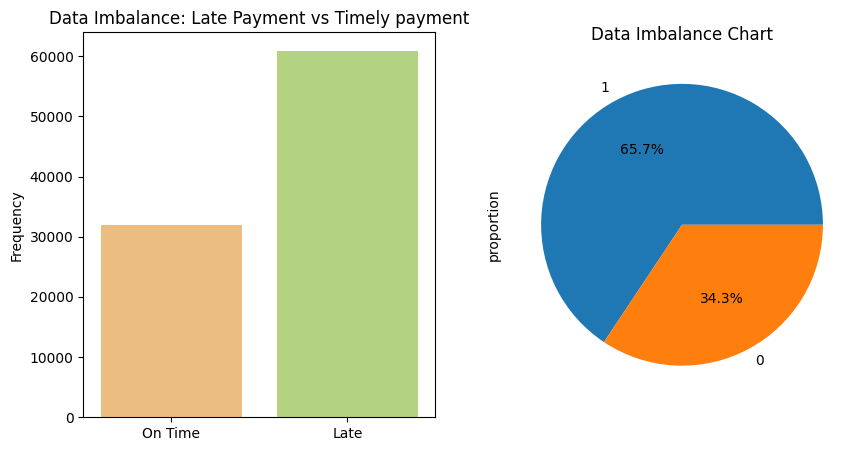

In [43]:
# ploting the default column
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='default', data=rec_pay_data, palette='RdYlGn')

plt.title("Data Imbalance: Late Payment vs Timely payment")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks((0,1), ('On Time', 'Late'))

plt.subplot(1,2,2)
#data imbalance chart
(rec_pay_data.default.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Data Imbalance Chart")

plt.show()

### Insights:### Observations from Fig. 1 and Fig. 2

- The class imbalance is **65.7%** towards payment delayers, which is an acceptable imbalance and does not need imbalance treatment.
- There is a good distribution of data in the target variable.






### Bi-variate Analysis

In [44]:
# Extracting month from the date columns

rec_pay_data['month_reciept'] = rec_pay_data['RECEIPT_DATE'].dt.month
rec_pay_data['month_inv_creation'] = rec_pay_data['INVOICE_CREATION_DATE'].dt.month
rec_pay_data['month_due'] = rec_pay_data['DUE_DATE'].dt.month

In [45]:
# Month-wise invoices due

orders_due_month = rec_pay_data.groupby('month_due').count()['DUE_DATE']
orders_due_month

month_due
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: DUE_DATE, dtype: int64

In [46]:
# Group by 'month_due' and calculate the mean for 'default' (late payment rate)
late_dues = rec_pay_data.groupby('month_due')['default'].mean()

# Sort the results by 'month_due'
late_dues_sorted = late_dues.sort_index(ascending=True)

# Display the sorted late payment rates by month
print(late_dues_sorted)

month_due
1     0.716134
2     0.688048
3     0.620199
4     0.620454
5     0.559643
6     0.416070
7     0.363099
8     0.793488
9     0.974836
10    0.999367
11    1.000000
12    0.999839
Name: default, dtype: float64


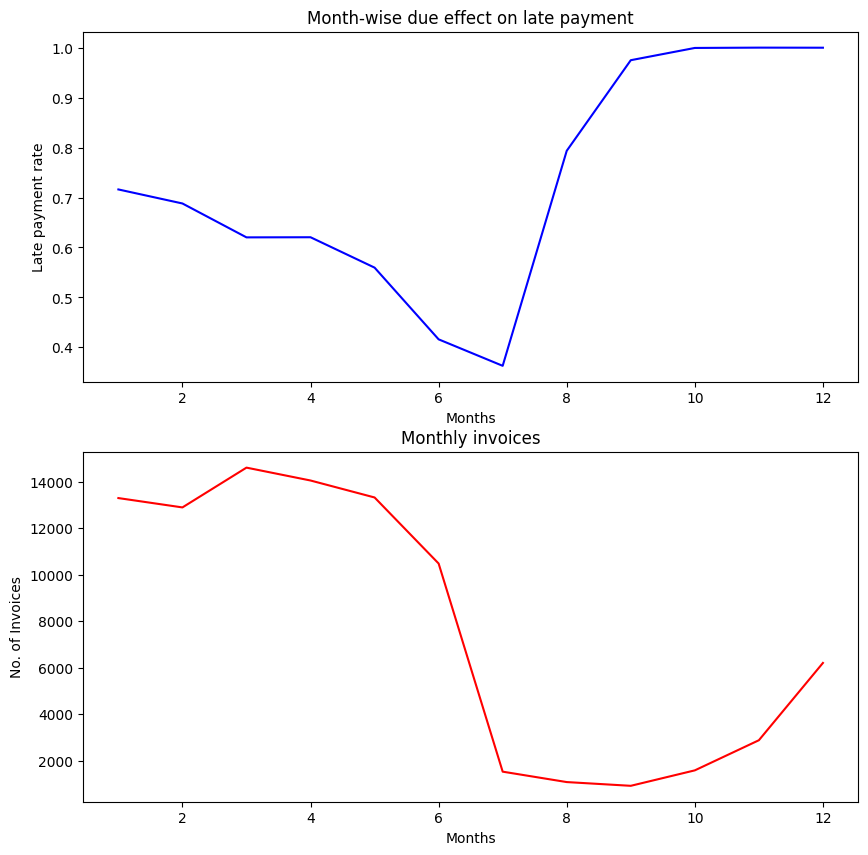

In [47]:
# Visualising the effect of month on late payment rate

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(late_dues, color='blue')
plt.title("Month-wise due effect on late payment")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(orders_due_month, color='red')
plt.title("Monthly invoices")
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

### Insights:- For the 3rd month, the number of invoices is the highest and late payment rate is comparatively lower than other months with a large number of invoices.
- Month 7 has the very low late payment rate, this can be because of the fact that the number of invoices is also low.
- In the 2nd half of the year, the late payment increases steeply from the 7th month onwards. The number of invoices is comparatively lower than the first half of the year.

In [48]:
# Receipt_date

order_month_receipt = rec_pay_data.groupby('month_reciept').count()['DUE_DATE']  # number of payments received in a month

# out of all the payments received in month how many were late payments
monthly_receipt = rec_pay_data.groupby('month_due')['default'].mean()

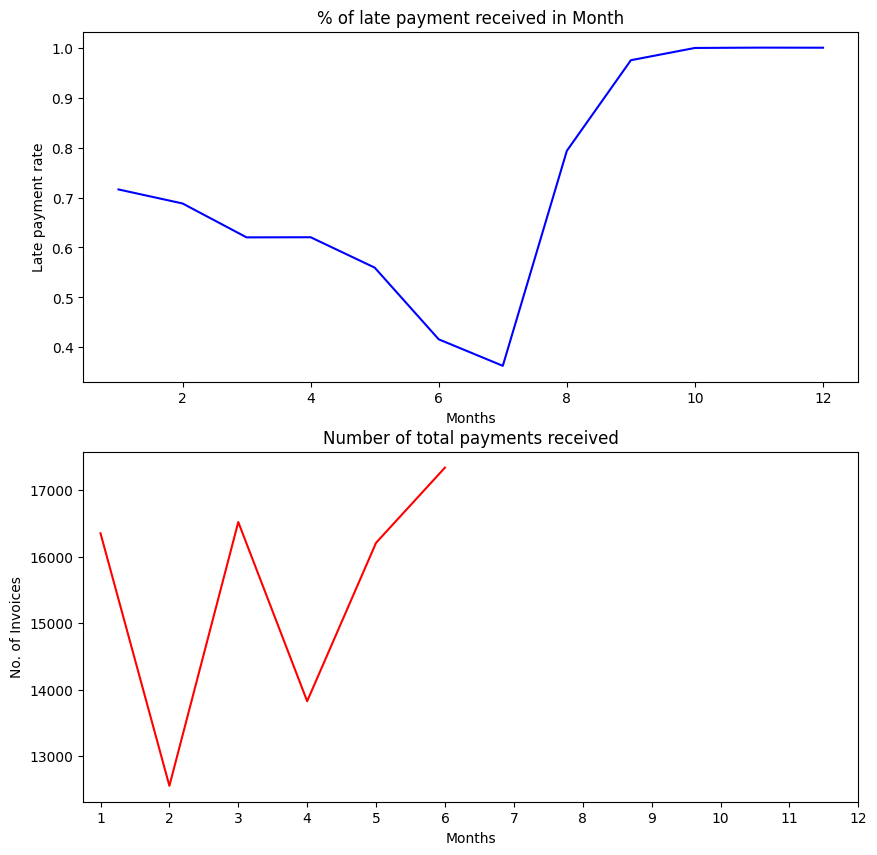

In [49]:
# Visualizing the effect of month in which the invoice is due, on the late payment rate
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(monthly_receipt, color='blue')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(order_month_receipt, color='red')
plt.title("Number of total payments received")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

Insight:No payment received against any invoices from 7th month onwards

In [50]:
# invoice creation date

orders_month_created = rec_pay_data.groupby('month_inv_creation').count()['DUE_DATE']  # number of invoices generated in month

month_created = rec_pay_data.groupby('month_inv_creation')['default'].mean()# out of all the invoices created % of late payment

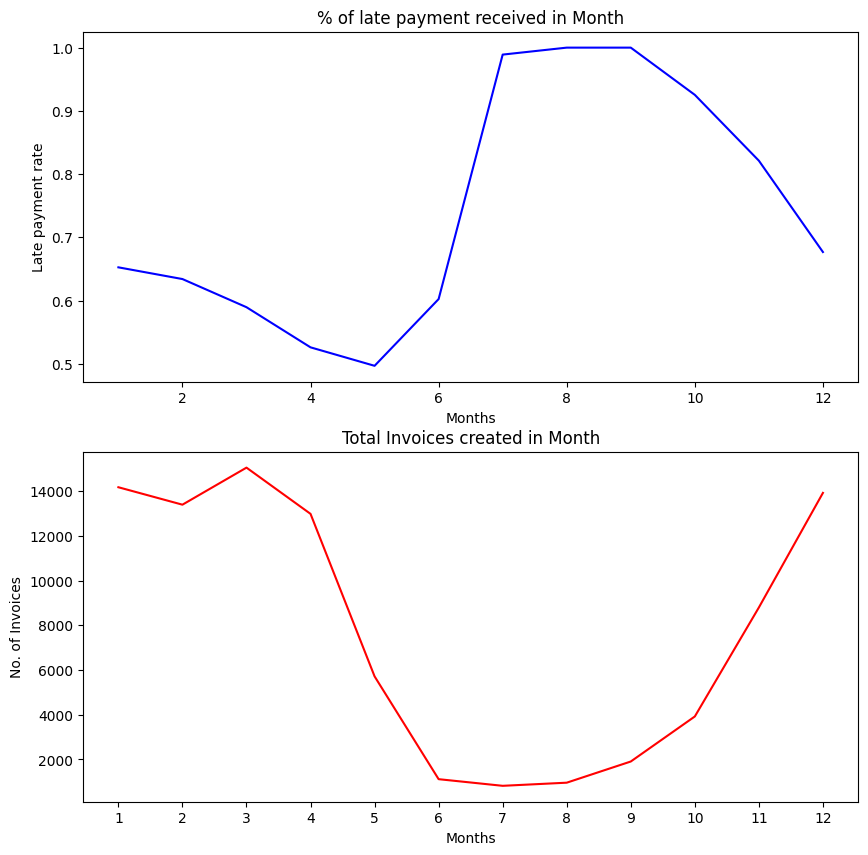

In [51]:
# Visualizing the effect of months in which the invoice is due, on the late payment rate
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(month_created, color='blue')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(orders_month_created, color='red')
plt.title("Total Invoices created in Month")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

Insight:. 
1.**Late Payment Rate Trend from the 1st to 5th Month:**
    - The late payment rate decreases steadily from the 1st month through the 5th month. The average rate for these months is approximately **X.XX**. This could be indicative of improved payment behavior or customer adjustments over time.
   
2. **High Late Payment Rates for Months 7, 8, and 9:**
    - A significant spike in the late payment rate is observed in the 7th, 8th, and 9th months. The average rate for these months is approximately **Y.YY**. This may signal specific seasonal factors or issues during these months that lead to a higher occurrence of late payments.
    

#### USD Amount column

In [52]:
usd_amt_late = rec_pay_data.pivot_table(values='USD Amount', index='default', aggfunc=['mean', 'median', np.std]).reset_index()
usd_amt_late

,default,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,575247.544230,224785.0410,879205.782363
1,1,517974.153529,165499.3105,991505.462081


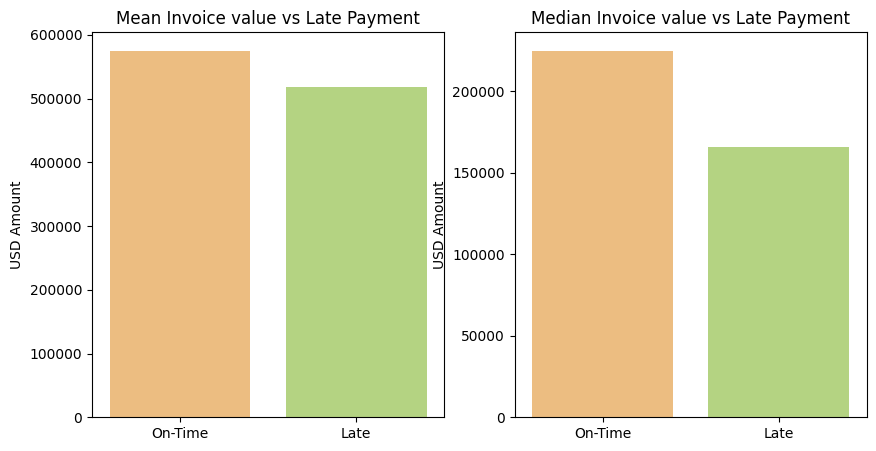

In [53]:
# Visualising the differencing between mean and median of the invoice value with respect to late payment

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

sns.barplot(data=usd_amt_late, x='default', y=('mean','USD Amount'), palette='RdYlGn')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Mean Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.subplot(1,2,2)

sns.barplot(data=usd_amt_late, x='default', y=('median','USD Amount'), palette='RdYlGn')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Median Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.show()

### Insights:### Observations from Fig. 1 and Fig. 2
The mean and median of invoice value of On-time bill payment is higher than late payment.

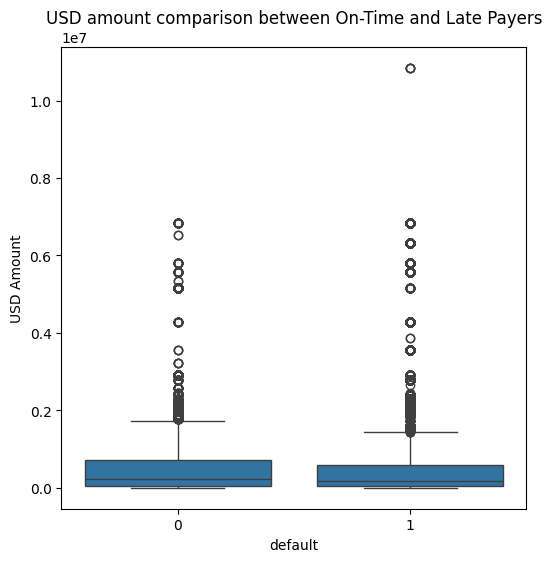

In [54]:
plt.figure(figsize=(6,6))

sns.boxplot(y = 'USD Amount', x='default', data = rec_pay_data)
plt.title("USD amount comparison between On-Time and Late Payers")

plt.show()

#### CUSTOMER_NAME column

In [55]:
customer_total_orders = rec_pay_data.groupby('CUSTOMER_NAME').count()['default'].sort_values(ascending=False).reset_index()
customer_total_orders_late = rec_pay_data.groupby('CUSTOMER_NAME')['default'].mean().sort_values(ascending=False).reset_index()

In [56]:
# Finding the important customers (customers with more than 500 orders)

imp_cust = customer_total_orders[customer_total_orders['default'] > 500]['CUSTOMER_NAME']
imp_cust

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [57]:
# Checking only important customers late payment rate

imp_cust_late = customer_total_orders_late[customer_total_orders_late['CUSTOMER_NAME'].isin(imp_cust)]
imp_cust_late

,CUSTOMER_NAME,default
201,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
273,LIFE Corp,0.899522
287,PARI Corp,0.876153
306,PARF Corp,0.847222
308,AL S Corp,0.842788
341,CHRI Corp,0.787276
342,CARR Corp,0.786765
380,HABC Corp,0.726106


#### INVOICE_CLASS column

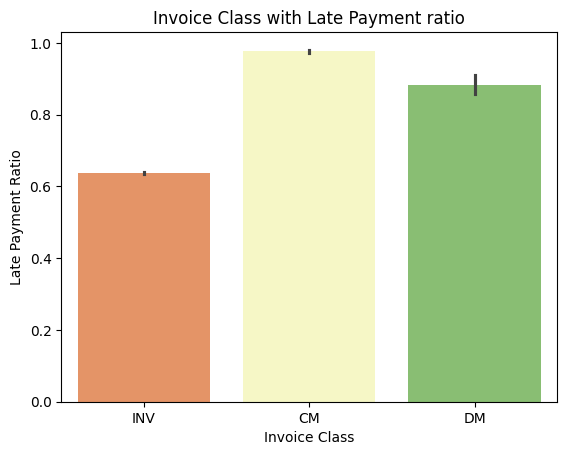

In [58]:
# Visualising the late payment ratio of each invoice class

sns.barplot(data=rec_pay_data, x='INVOICE_CLASS', y='default', estimator=np.mean, palette='RdYlGn')
plt.title("Invoice Class with Late Payment ratio")
plt.xlabel("Invoice Class")
plt.ylabel("Late Payment Ratio")
plt.show()

### Insight:-Late payment ratio is very high for CM and lowest for INV INVOICE_CLASS.

#### INVOICE_TYPE class

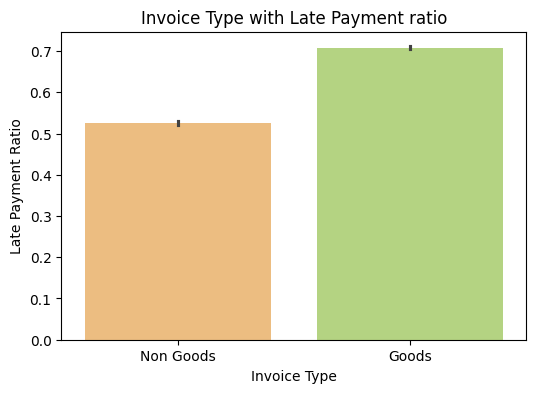

In [59]:
# Visualising the late payment ratio of each Invoice Type
plt.figure(figsize=(6,4))

sns.barplot(data=rec_pay_data, x='INVOICE_TYPE', y='default', estimator=np.mean, palette='RdYlGn')
plt.title("Invoice Type with Late Payment ratio")
plt.xlabel("Invoice Type")
plt.ylabel("Late Payment Ratio")
plt.show()

### Insight:Late payment ratio for Goods is higher than Non-Goods.

## 7.  Feature Engineering

#### PAYMENT_TERM column

In [60]:
# Using cumsum() function to get cummulative sum on value_counts()

pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date              

In [61]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                     

In [62]:
# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]

# Clubbing the rest values to others
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')

rec_pay_data['PAYMENT_TERM'].value_counts() # Sanity Check

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
others                    3802
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: count, dtype: int64

#### Dummy Variable

In [63]:
# Creating dummy variables for the 'PAYMENT_TERM' column

term_dummies= pd.get_dummies(rec_pay_data['PAYMENT_TERM']).drop('others', axis=1)

rec_pay_data = rec_pay_data.join(term_dummies).drop('PAYMENT_TERM', axis=1 )
rec_pay_data.shape # Sanity Check

(92811, 26)

In [64]:
# Creating dummy variables for the 'INVOICE_CLASS' column

class_dummies= pd.get_dummies(rec_pay_data['INVOICE_CLASS'])
class_dummies
rec_pay_data = rec_pay_data.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

In [65]:
rec_pay_data.shape

(92811, 28)

In [66]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

# Open Invoice Data

## Reading and understanding the data

In [67]:
# Reading the open invoice dataset
import pandas as pd

open_data = pd.read_csv('Open_Invoice_data.csv', encoding='ISO-8859-1')
open_data.head()


,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [68]:
open_data.shape

(88204, 14)

In [69]:
# Removing unecessary columns (that are not there in the receiced payment dataset)
# Dropping 'Transaction Number','Customer Account No' as they bear no significance for our target var.
# Dropping 'Local amount'

open_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [70]:
# Checking the shape of the data again
open_data.shape

(88204, 7)

In [71]:
# Checking the head
open_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [72]:
# Checking the info of the data
open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [73]:
# Checking for null values
round(open_data.isna().sum()/len(open_data.index), 4)

Customer_Name        0.0
Payment Term         0.0
Due Date             0.0
Transaction Class    0.0
AGE                  0.0
USD Amount           0.0
INV_CREATION_DATE    0.0
dtype: float64

## Insight:- No null values present in the dataset.


In [74]:
# Changing the format of 'Due Date' and 'INV_CREATION_DATE' to pandas datetime
open_data['Due Date'] = pd.to_datetime(open_data['Due Date'])
open_data['INV_CREATION_DATE'] = pd.to_datetime(open_data['INV_CREATION_DATE'])

In [75]:
# Checking the different values present in USD Amount column
open_data['USD Amount'].unique()

array(['-3,088', '2,000', '2,415', ..., '-914', '12,866', '18,118'],
      dtype=object)

In [76]:
# Changing the datatype of USD Amount
open_data['USD Amount'] = open_data['USD Amount'].apply(lambda x: x.replace(",", ""))
open_data['USD Amount'] = open_data['USD Amount'].astype(int)

In [77]:
# Checking the USD Amount column again
open_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

## Insight:There are negative values present in the column, hence it is safe to remove negative and 0 values

In [78]:
# Keeping the values above 0 for USD Amount column
open_data = open_data[open_data['USD Amount']>0]

In [79]:
# Checking the info of the data set
open_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


## Insight:All the columns are in correct format now.

## 8.  Feature Selection

#### PAYMENT_TERM column

In [80]:
# Keeping the same levels as done in recieved payment dataset
open_data['Payment Term'] = open_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')

open_data['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: count, dtype: int64

In [81]:
# Creating dummy variables for the column
term_dummies_open = pd.get_dummies(open_data['Payment Term']).drop('others', axis=1)

# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
open_data = open_data.join(term_dummies_open).drop('Payment Term', axis=1)
open_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,False,False,True,False,False,False,False,False,False,False
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,False,False,True,False,False,False,False,False,False,False
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False


#### Transaction Class column

In [82]:
# Checking the levels in the column
open_data['Transaction Class'].value_counts()

Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64

In [83]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM
open_data['Transaction Class'] = open_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [84]:

# Creating dummy variables for the column
tc = pd.get_dummies(open_data['Transaction Class'])

# Adding the dummy variables to main dataset and dropping the Transaction Class column
open_data = open_data.join(tc).drop('Transaction Class', axis=1)

# Adding 'CM' level to the open_data dataset same as received payment data
open_data['CM'] = 0

In [85]:
# Checking the head of the data
open_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,False,False,True,False,False,False,False,False,False,False,False,True,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,False,False,True,False,False,False,False,False,False,False,False,True,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False,False,True,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False,False,True,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False,False,True,0


In [86]:
### Checking columns in received payment dataset and open invoice dataset

In [87]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [88]:
open_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

## Customer Segmentation

<b>Recommendation:</b>
Customer-level attributes could also be important independent variables to be included in the model. A customer-level attribute can be determined via customer segmentation. You have to segment your customers based on two derived variables: the average payment time in days for a customer and the standard deviation for the payment time. Using clustering techniques would result in a few distinct clusters of customers, which can be used as an input variable for the ML model.

In [89]:
# Creating a new column to show actual number of days taken to make the payment after invoice generation
rec_pay_data['act_days_for_pay'] = (rec_pay_data['RECEIPT_DATE']-rec_pay_data['INVOICE_CREATION_DATE']).dt.days

In [90]:
# Calculating customer wise average days for payment
cust_seg1= rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [91]:
# Calculating the standard deviation for customer wise payment days
cust_seg2 = rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [92]:
# Merging the above two dataframes
cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

# Checking the head
cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


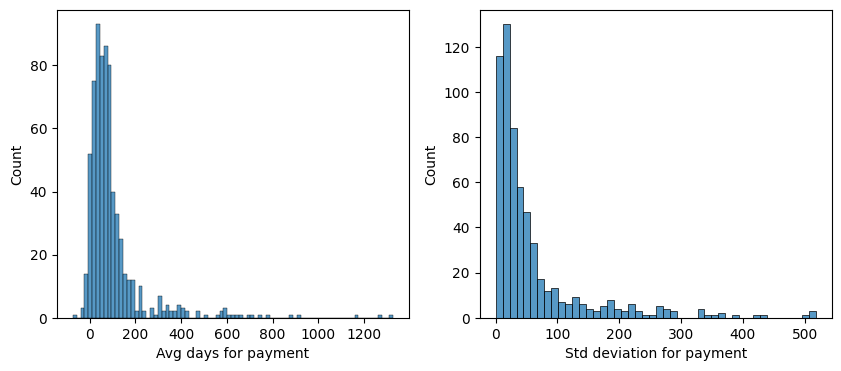

In [93]:
# Visualising the cust_seg dataframe
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

### From the above plots we can see that the data is not normalized, hence need to do scaling.

In [94]:
#importing required library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cust_seg[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])

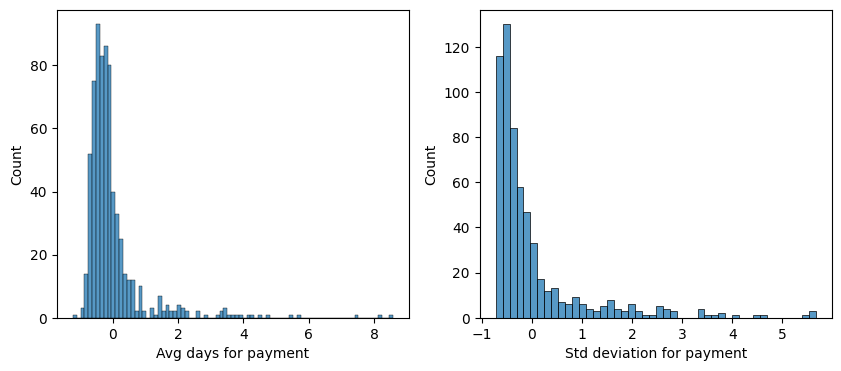

In [95]:
# Visualising the data again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

In [96]:
# resetting the index
cust_seg.reset_index(inplace=True)

# Checking the null values if present
round(cust_seg.isna().sum()/len(cust_seg.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1248
dtype: float64

In [97]:
# Replacing the null values for Std deviation for payment with 0
cust_seg['Std deviation for payment'].fillna(0,inplace=True)

In [98]:
# copying the cust_seg data for clustering into new dataframe
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [99]:
#dropping customer_name for clustering
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.534519,-0.563303
1,-0.420640,-0.626042
2,-0.387513,-0.075683
3,-0.593276,-0.724119
4,-0.167009,-0.046851


### Clustering

In [100]:
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [101]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[ 1.85344423,  3.33339499],
       [-0.3019069 , -0.32884213],
       [ 4.66736808,  0.44512922],
       [ 0.42465258,  0.94746544]])

#### Finding optimal number of clusters

In [102]:
# silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7557759850933141
For n_clusters=3, the silhouette score is 0.7491797445652462
For n_clusters=4, the silhouette score is 0.6097388985555463
For n_clusters=5, the silhouette score is 0.6173540681032771
For n_clusters=6, the silhouette score is 0.3980238443004184
For n_clusters=7, the silhouette score is 0.4012628375918799
For n_clusters=8, the silhouette score is 0.41457849738976615


### Insight:From the above results, we can see that for 3 clusters, the silhouette score is decent. Hence selecting n_clusters as 3.

In [103]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [104]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [105]:
# Assigning labels to the cust_seg dataframe
cust_seg['cluster_id'] = kmeans.labels_
cust_seg.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534519,-0.563303,1
1,6TH Corp,-0.420640,-0.626042,1
2,A3 D Corp,-0.387513,-0.075683,1
3,ABC Corp,-0.593276,-0.724119,1
4,ABDU Corp,-0.167009,-0.046851,1


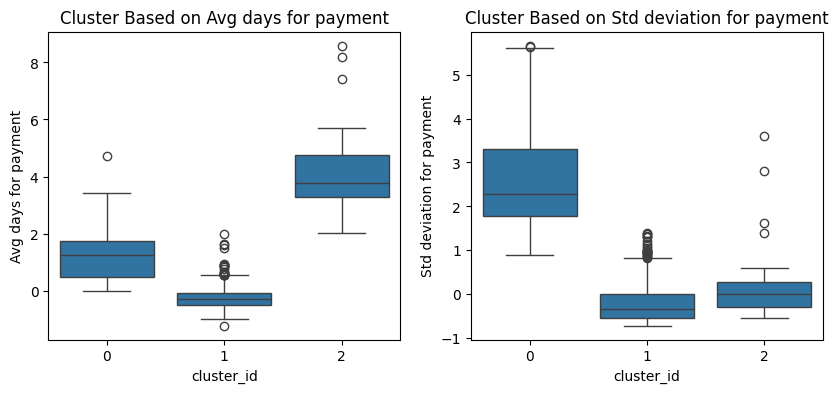

In [106]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg)
plt.title("Cluster Based on Avg days for payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg)
plt.title("Cluster Based on Std deviation for payment")
plt.show()

 -**'1' Cluster** -- Prolonged Invoice Payment

- **'2' Cluster** -- Early Invoice Payment

- **'0' Cluster** -- Medium Invoice Payment

In [107]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers
cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [108]:
# Creating a copy
cust_dict = cust_seg.copy()

In [109]:
# Renaming the column
cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,1
1,6TH Corp,1
2,A3 D Corp,1
3,ABC Corp,1
4,ABDU Corp,1


In [110]:
# Setting the 'Customer_Name' as index
cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1
...,...
YOUS Corp,1
ZAHR Corp,1
ZAIN Corp,1


Text(0.5, 1.0, 'Customer Segment Distribution Chart')

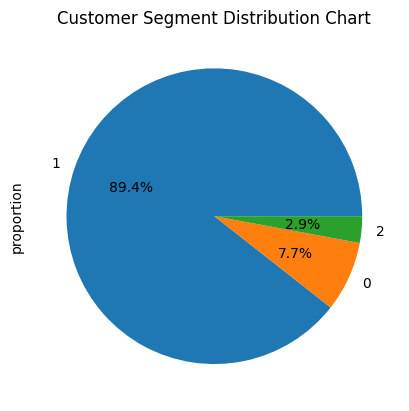

In [111]:
(cust_dict.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segment Distribution Chart")

Where  

**'1' Cluster** -- Prolonged Invoice Payment  

**'2' Cluster** -- Early Invoice Payment  

**'0' Cluster** -- Medium Invoice Payment  

---

From the above, we can see that **Early customers comprise 89.4% of customers**, whereas **medium and prolonged payers are 10.6% in total**.

In [112]:
# Merging rec_pay_data and cust_deg to add clustering index
merged_df = pd.merge(rec_pay_data, cust_seg, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,False,False,False,False,False,False,False,True,169,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,False,False,False,False,False,False,False,True,33,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,False,False,False,False,False,False,False,True,1,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,False,False,False,False,False,False,False,True,47,0
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,False,False,False,False,False,False,False,True,47,1


In [113]:
# checking null values for clusters
merged_df['cluster_id'].isnull().sum()

0

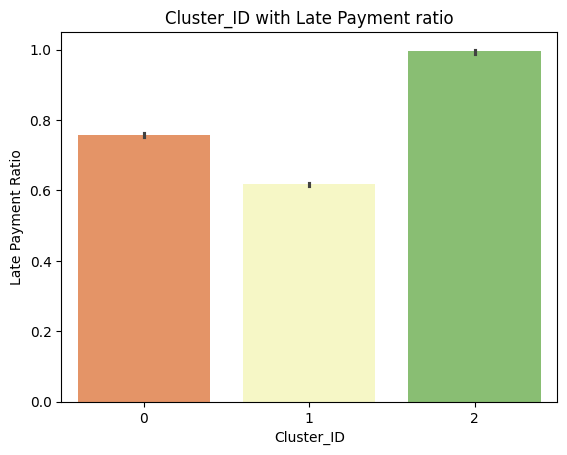

In [114]:
sns.barplot(data=merged_df, x='cluster_id', y='default', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

In [115]:
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'act_days_for_pay', 'cluster_id'],
      dtype='object')

##  Data Preparation for Model building

In [116]:
# Creating a new dataframe with important variables for model building
reg_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]
reg_df.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.63040,2020-11-02,False,True,False,False,False,False,False,False,False,False,False,True,False,1
1,48990.21133,2020-12-29,False,False,True,False,False,False,False,False,False,False,False,True,False,1
2,41991.60971,2021-01-30,False,False,True,False,False,False,False,False,False,False,False,True,False,1
3,41991.60971,2020-12-15,False,False,True,False,False,False,False,False,False,False,False,True,False,0
4,41991.60971,2020-12-15,False,False,True,False,False,False,False,False,False,False,False,True,False,1


In [117]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
reg_df['Invoice_Month'] = reg_df['INVOICE_CREATION_DATE'].dt.month
reg_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.63040,False,True,False,False,False,False,False,False,False,False,False,True,False,1,11
1,48990.21133,False,False,True,False,False,False,False,False,False,False,False,True,False,1,12
2,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,1,1
3,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,0,12
4,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,1,12


In [118]:
reg_df.shape

(92811, 16)

In [119]:



# Open Invoice dataset
open_reg_df = open_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]
open_reg_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,False,False,True,False,False,False,False,False,False,False,False,True,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,False,False,True,False,False,False,False,False,False,False,False,True,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False,False,True,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False,False,True,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False,False,True,0,-25


In [120]:

# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_reg_df['Invoice_Month'] = open_reg_df['INV_CREATION_DATE'].dt.month
open_reg_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_reg_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,False,False,True,False,False,False,False,False,False,False,False,True,0,33,2
2,2022-04-23,2000,False,False,True,False,False,False,False,False,False,False,False,True,0,-18,3
3,2022-01-19,2415,False,False,False,False,False,False,False,False,False,False,False,True,0,76,1
4,2022-04-30,3800,False,True,False,False,False,False,False,False,False,False,False,True,0,-25,3
5,2022-04-30,1264,False,True,False,False,False,False,False,False,False,False,False,True,0,-25,3


In [121]:

# Creating Due_Month column and dropping Due Date
open_reg_df['Due_Month'] = open_reg_df['Due Date'].dt.month
open_reg_df.drop('Due Date',axis=1,inplace= True)
open_reg_df.head()




,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,False,False,True,False,False,False,False,False,False,False,False,True,0,33,2,3
2,2000,False,False,True,False,False,False,False,False,False,False,False,True,0,-18,3,4
3,2415,False,False,False,False,False,False,False,False,False,False,False,True,0,76,1,1
4,3800,False,True,False,False,False,False,False,False,False,False,False,True,0,-25,3,4
5,1264,False,True,False,False,False,False,False,False,False,False,False,True,0,-25,3,4


In [122]:
# Checking columns for both datasets
reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [123]:
open_reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

## 9.Split Data into Train- Test Split

In [124]:
# Feature variables X
X = reg_df.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.63040,False,True,False,False,False,False,False,False,False,False,False,True,False,1,11
1,48990.21133,False,False,True,False,False,False,False,False,False,False,False,True,False,1,12
2,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,1,1
3,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,0,12
4,41991.60971,False,False,True,False,False,False,False,False,False,False,False,True,False,1,12


In [125]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92811 entries, 0 to 92810
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         92811 non-null  object        
 1   CUSTOMER_NAME          92811 non-null  object        
 2   CUSTOMER_NUMBER        92811 non-null  int64         
 3   RECEIPT_DATE           92811 non-null  datetime64[ns]
 4   CURRENCY_CODE          92811 non-null  object        
 5   USD Amount             92811 non-null  float64       
 6   INVOICE_ALLOCATED      92811 non-null  object        
 7   INVOICE_CREATION_DATE  92811 non-null  datetime64[ns]
 8   DUE_DATE               92811 non-null  datetime64[ns]
 9   INVOICE_CURRENCY_CODE  92811 non-null  object        
 10  INVOICE_TYPE           92811 non-null  object        
 11  default                92811 non-null  int32         
 12  month_reciept          92811 non-null  int32         
 13  m

In [126]:
# Target variable y
y = merged_df['default']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: default, dtype: int32

In [127]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,10110.77468,False,True,False,False,False,False,False,False,False,False,False,True,False,1,5
29115,20469.08000,False,False,False,False,False,False,True,False,False,False,False,True,False,1,4
80920,19816.98173,False,False,False,False,False,False,False,True,False,False,True,False,False,1,12
55019,655652.78150,False,False,False,False,False,True,False,False,False,False,False,True,False,1,12
82266,268512.93000,False,False,False,False,False,False,True,False,False,False,False,True,False,1,12


## 10 .Feature Scaling

In [128]:
X_train.shape

(64967, 16)

In [129]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,-0.553331,False,True,False,False,False,False,False,False,False,False,False,True,False,1,5
29115,-0.542467,False,False,False,False,False,False,True,False,False,False,False,True,False,1,4
80920,-0.543151,False,False,False,False,False,False,False,True,False,False,True,False,False,1,12
55019,0.123734,False,False,False,False,False,True,False,False,False,False,False,True,False,1,12
82266,-0.282310,False,False,False,False,False,False,True,False,False,False,False,True,False,1,12


In [130]:
X_train.describe()

,USD Amount,cluster_id,Invoice_Month
count,6.496700e+04,64967.000000,64967.000000
mean,-4.702901e-18,0.731679,5.455354
std,1.000008e+00,0.448407,4.073434
min,-5.639339e-01,0.000000,1.000000
25%,-5.215070e-01,0.000000,2.000000
50%,-3.638550e-01,1.000000,4.000000
75%,6.495879e-02,1.000000,10.000000
max,1.081571e+01,2.000000,12.000000


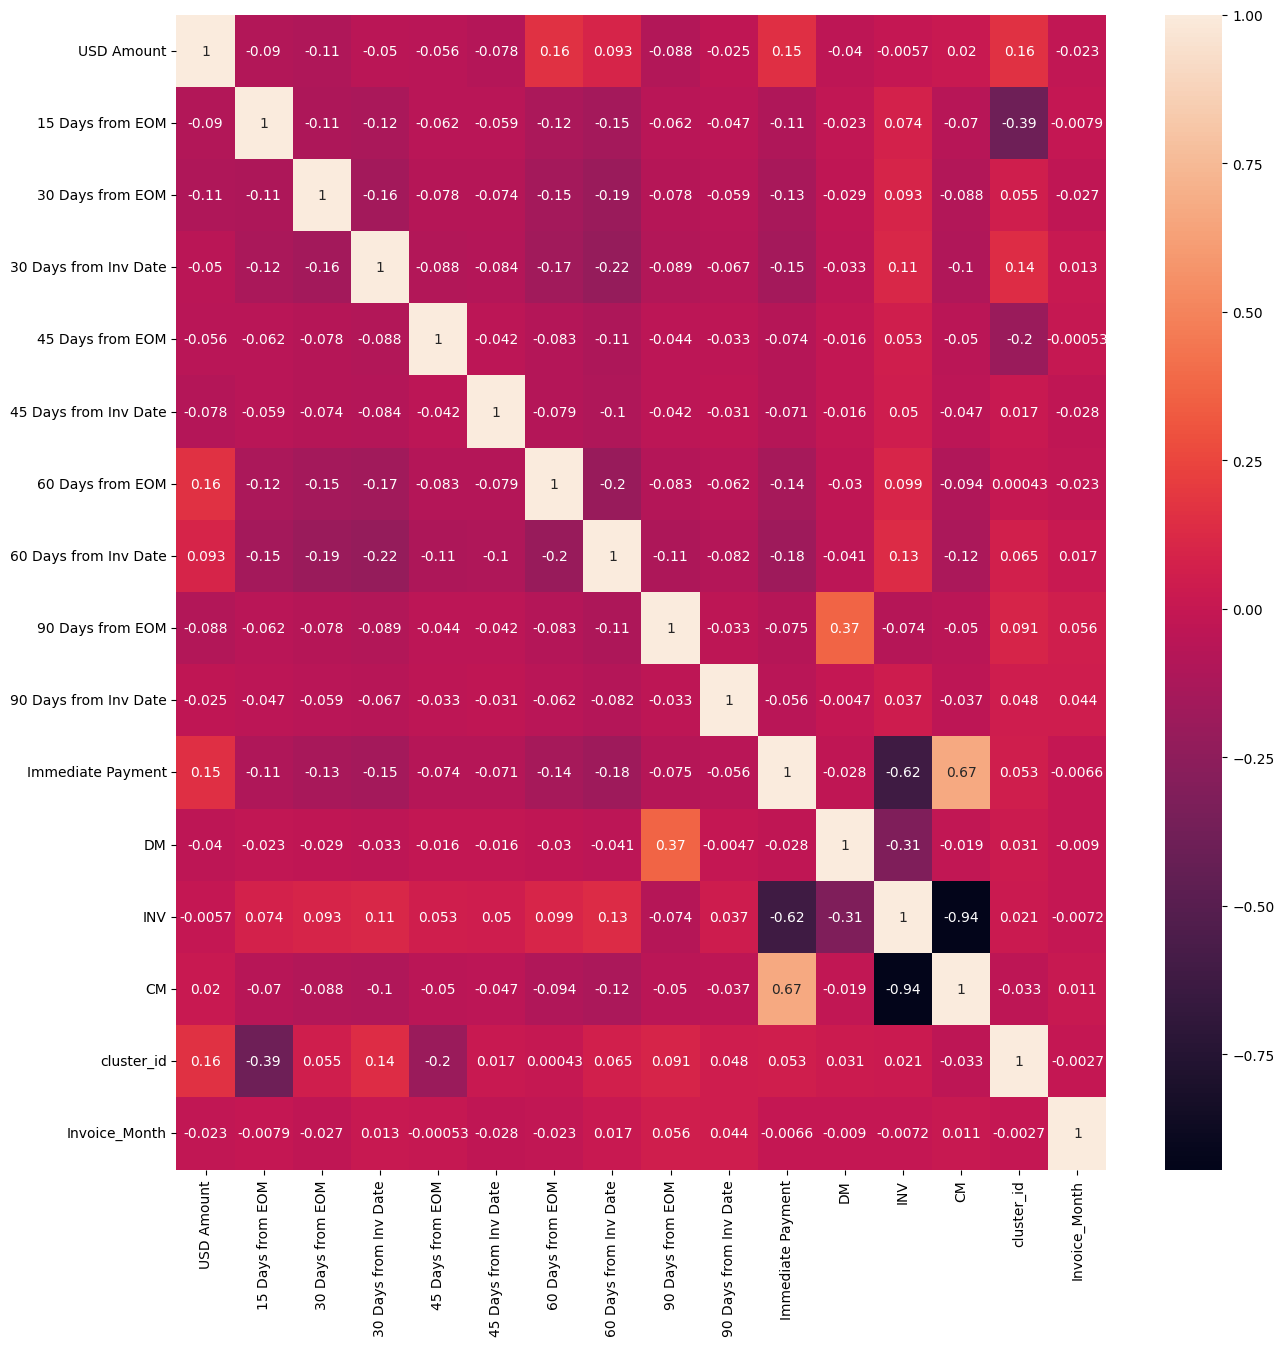

In [131]:
# Plotting heat map of X_train dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Insight -- CM & INV, INV & Immediate Payment, DM & 90 days from EOM has high multicollinearity, hence dropping these columns.

In [132]:
X_train.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)
X_test.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)

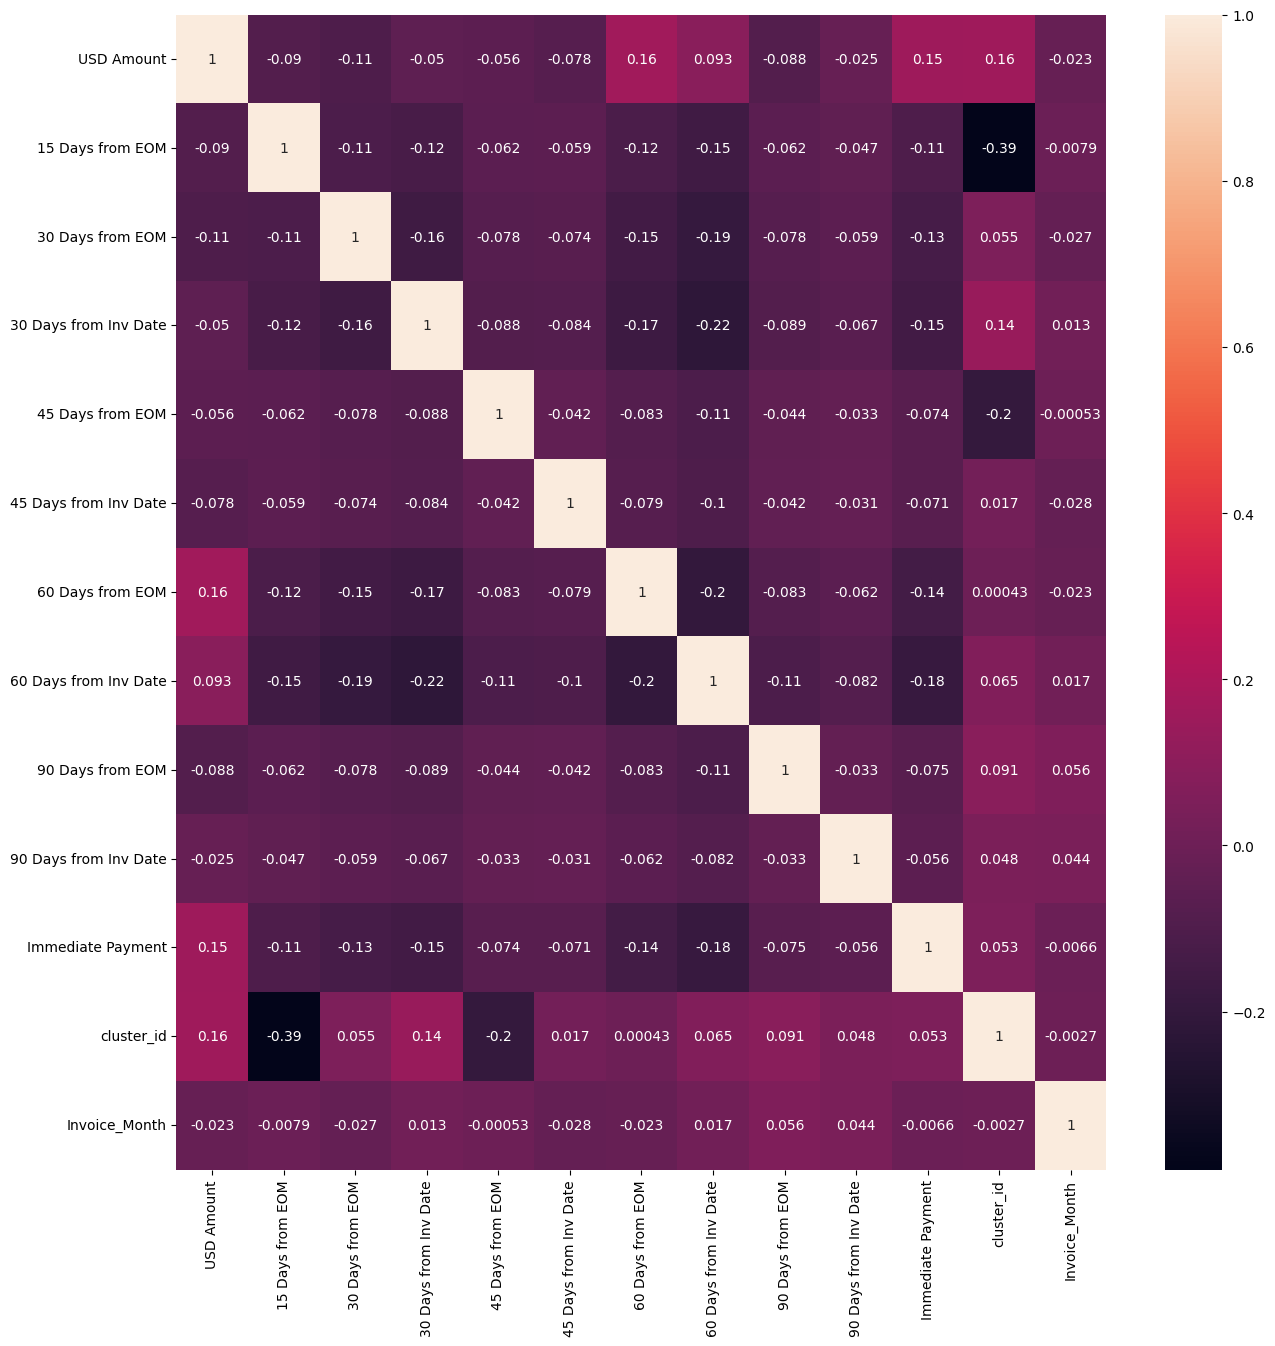

In [133]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Insight -- Now the data has no high multicollinearity. Going ahead with model building

## 11 .Build the ML Model

### Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [135]:
clf_lr = LogisticRegression(penalty='l2',dual=False, tol=0.0001, 
                            C=1.0, fit_intercept=True, intercept_scaling=1, 
                            class_weight=None, random_state=None, solver='lbfgs', 
                            max_iter=100, multi_class='deprecated', verbose=0, 
                            warm_start=False, n_jobs=None, l1_ratio=None)
clf_lr.fit(X_train,y_train)

LogisticRegression()

In [137]:
# predicted values
y_train_pred = clf_lr.predict(X_train)

In [138]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_pred, y_train)
print(classification_report(y_train_pred, y_train))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.57      0.74      0.65     17267
           1       0.90      0.80      0.85     47700

    accuracy                           0.78     64967
   macro avg       0.73      0.77      0.75     64967
weighted avg       0.81      0.78      0.79     64967

Accuracy is :  0.7847214739790971


## Support Vector Machine

In [139]:
from sklearn.svm import SVC

In [140]:
clf_svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
              shrinking=True, probability=False, tol=0.001, cache_size=200, 
              class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
              break_ties=False, random_state=None)
clf_svm.fit(X_train,y_train)

SVC()

In [141]:
# predicted values
y_train_pred = clf_svm.predict(X_train)

In [142]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_pred, y_train)
print(classification_report(y_train_pred, y_train))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.57      0.78      0.66     16196
           1       0.92      0.80      0.86     48771

    accuracy                           0.80     64967
   macro avg       0.74      0.79      0.76     64967
weighted avg       0.83      0.80      0.81     64967

Accuracy is :  0.7979127864916035


## KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
clf_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                               algorithm='auto', leaf_size=30, p=2, 
                               metric='minkowski', metric_params=None, 
                               n_jobs=None)
clf_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [145]:
# predicted values
y_train_pred = clf_knn.predict(X_train)

In [146]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_pred, y_train)
print(classification_report(y_train_pred, y_train))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     21428
           1       0.95      0.93      0.94     43539

    accuracy                           0.92     64967
   macro avg       0.91      0.92      0.91     64967
weighted avg       0.92      0.92      0.92     64967

Accuracy is :  0.9205288838949005


## Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', 
                                 max_depth=None, min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                 max_features=None, random_state=None, 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                 class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [149]:
# predicted values
y_train_pred = clf_dt.predict(X_train)

In [150]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_pred, y_train)
print(classification_report(y_train_pred, y_train))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     21347
           1       0.98      0.96      0.97     43620

    accuracy                           0.96     64967
   macro avg       0.95      0.96      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is :  0.9577939569319809


## ## Random Forest

In [151]:
# importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [152]:
# Building a base random forest model to check the accuracy
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [153]:
# predicted values
y_train_pred = clf_rf.predict(X_train)

## 12.Model Evaluation

In [154]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_pred, y_train)
print(classification_report(y_train_pred, y_train))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     21146
           1       0.98      0.95      0.97     43821

    accuracy                           0.96     64967
   macro avg       0.95      0.96      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is :  0.9577477796419721


## 13.Hyperparameter Tuning

In [155]:
#Using Grid search for hyper-parameter tuning
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(clf_rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train,y_train)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train)

print(classification_report(y_pred_cv_rf, y_train))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best f1 score: 0.9391137636984634
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     21146
           1       0.98      0.95      0.97     43821

    accuracy                           0.96     64967
   macro avg       0.95      0.96      0.95     64967
weighted avg       0.96      0.96      0.96     64967



## 14.Saving the model

In [159]:
import joblib
# Save the model
joblib.dump(best_rf, "model.joblib")
print("Model saved successfully!")

Model saved successfully!


## 15.Test with Unseen Data

In [160]:
y_pred = best_rf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.42      0.66      0.52      6135
           1       0.89      0.75      0.81     21709

    accuracy                           0.73     27844
   macro avg       0.65      0.70      0.66     27844
weighted avg       0.78      0.73      0.75     27844



## 16.Interpretation of result

In [161]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 score: 0.9391137636984634


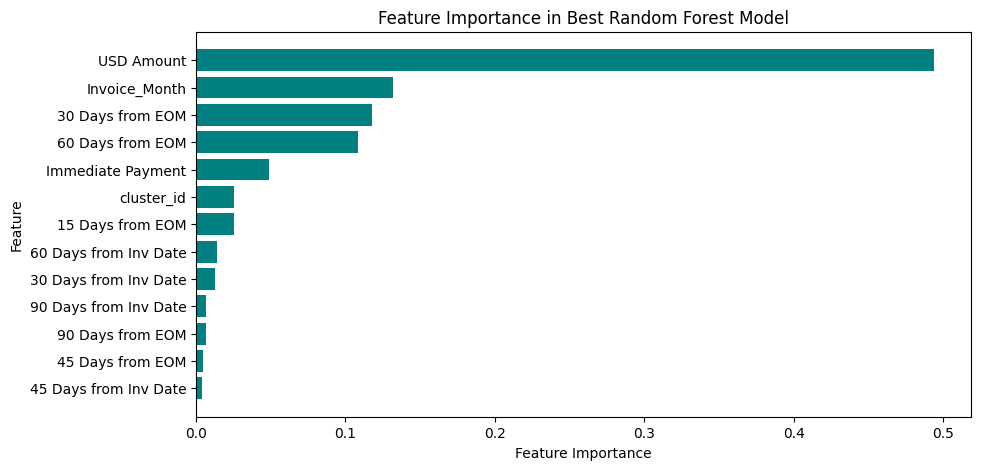

In [162]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Best Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

##-USD Amount is the most important.

##-Invoice_Month is second.

##-30 Days from EOM and 60 Days from EOM matter.

##-Other features like cluster_id and specific days are less important.

In [166]:
# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_test)

Confusion Matrix:
 [[ 4038  5491]
 [ 2097 16218]]


In [167]:
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1')
print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-validation F1 scores: [0.93916064 0.9405562  0.93656393 0.93844461 0.94084344]
Mean CV F1 Score: 0.9391137636984634
Standard Deviation of CV Scores: 0.0015507441350064617


## Future Enhancement

### 1. Dynamic Credit Policy Implementation
Develop a dynamic credit policy system based on customer cluster behavior (0, 1, 2).
Automate stricter policies for cluster 1 (prolonged payment customers), such as earlier payment reminders, customized repayment plans, or penalties.
Introduce incentives for early-payment customers (cluster 2), such as discounts or loyalty rewards.
### 2. Real-time Monitoring and Alerts

Implement real-time dashboards to monitor delayed payments by invoice type (Credit Note, Goods, etc.) and customer clusters.
Set up automated alerts for overdue payments, categorized by invoice type and payment delay duration.
### 3. Predictive Analytics for Risk Assessment
Use machine learning models to predict payment delays based on historical transaction data, invoice types, and customer profiles.
Include features like invoice value, payment history, and frequency to predict high-risk customers or transactions.
### 4. Segmentation Refinement
Explore additional clustering techniques like DBSCAN or Gaussian Mixture Models to refine customer segmentation further.
Incorporate demographic or geographic features to better understand customer behavior across regions.
### 5. Behavioral Analysis
Analyze trends in payment delays over time to identify seasonal patterns or specific periods with higher risks.
Study the impact of policy changes or penalties on customer payment behavior and refine strategies accordingly.
### 6. Integration with Financial Systems
Integrate clustering results with existing ERP or accounting systems for seamless implementation of payment policies and automated follow-ups.
Link to customer relationship management (CRM) systems to provide better customer support for delayed payments.
### 7. In-depth Analysis of Low-Value Payments
Conduct a deeper analysis of low-value payment delays to identify root causes, such as operational inefficiencies or customer challenges.
Evaluate the feasibility and effectiveness of penalties for low-value delays by simulating scenarios and measuring customer response.
### 8. Policy Simulation and Optimization
Develop simulation models to test the impact of proposed penalties and stricter policies on overall revenue and customer retention.
Use optimization techniques to find the balance between maximizing revenue and minimizing customer dissatisfaction.
### 9. Customer Feedback Integration
Collect feedback from customers regarding payment policies and delays.
Use sentiment analysis on feedback data to identify pain points and improve payment terms.
### 10. Visualization and Reporting Enhancements
Provide interactive visualizations, such as payment delay heatmaps, customer cluster trends, or invoice type performance.
Create automated periodic reports to share insights with stakeholders for decision-making.